#<p style="font-family: Fantasy, fantasy; line-height: 3.3; font-size: 40px; letter-spacing: 5px; text-align: center; color: #009ACD">Clustering: Facebook ads campaigns</p>
![](https://cdn.searchenginejournal.com/wp-content/uploads/2019/04/shutterstock_456779230.png)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #009ACD">Dataset information </p>

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #009ACD">Task </p>

Grouping ads based on their IMPRESSION, CLICKS, SPENT.

## **Importing libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## **Data reading**

In [2]:
df = pd.read_csv('../input/clicks-conversion-tracking/KAG_conversion_data.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')
(1143, 11)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## **Data information & exploration**

In [3]:
df.columns = df.columns.str.upper()
df.columns

Index(['AD_ID', 'XYZ_CAMPAIGN_ID', 'FB_CAMPAIGN_ID', 'AGE', 'GENDER',
       'INTEREST', 'IMPRESSIONS', 'CLICKS', 'SPENT', 'TOTAL_CONVERSION',
       'APPROVED_CONVERSION'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AD_ID                1143 non-null   int64  
 1   XYZ_CAMPAIGN_ID      1143 non-null   int64  
 2   FB_CAMPAIGN_ID       1143 non-null   int64  
 3   AGE                  1143 non-null   object 
 4   GENDER               1143 non-null   object 
 5   INTEREST             1143 non-null   int64  
 6   IMPRESSIONS          1143 non-null   int64  
 7   CLICKS               1143 non-null   int64  
 8   SPENT                1143 non-null   float64
 9   TOTAL_CONVERSION     1143 non-null   int64  
 10  APPROVED_CONVERSION  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# Investigating variables
for i in df.columns:
    if df[i].nunique() < 10:
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values: \n{df[i].value_counts()}')
        print(10*'==')
    else:
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values')
        print(10*'==')

The column "AD_ID" is __int64__ 
has __1143__ unique values
The column "XYZ_CAMPAIGN_ID" is __int64__ 
has __3__ unique values: 
1178    625
936     464
916      54
Name: XYZ_CAMPAIGN_ID, dtype: int64
The column "FB_CAMPAIGN_ID" is __int64__ 
has __691__ unique values
The column "AGE" is __object__ 
has __4__ unique values: 
30-34    426
45-49    259
35-39    248
40-44    210
Name: AGE, dtype: int64
The column "GENDER" is __object__ 
has __2__ unique values: 
M    592
F    551
Name: GENDER, dtype: int64
The column "INTEREST" is __int64__ 
has __40__ unique values
The column "IMPRESSIONS" is __int64__ 
has __1130__ unique values
The column "CLICKS" is __int64__ 
has __183__ unique values
The column "SPENT" is __float64__ 
has __869__ unique values
The column "TOTAL_CONVERSION" is __int64__ 
has __32__ unique values
The column "APPROVED_CONVERSION" is __int64__ 
has __16__ unique values


In [6]:
# Summary statistics
df.describe()

,AD_ID,XYZ_CAMPAIGN_ID,FB_CAMPAIGN_ID,INTEREST,IMPRESSIONS,CLICKS,SPENT,TOTAL_CONVERSION,APPROVED_CONVERSION
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
print('Total ADS: {}'.format(df.shape[0]))

print('Number of ADS with 0 clicks: {}'.format(len(df.loc[df['CLICKS'] == 0])))
print('Number of 0 paids to FACEBOOK for showing ADS: {}'.format(len(df.loc[df['SPENT'] == 0])))
print('Number of ADS with 0 enquires about their product: {}'.format(len(df.loc[df['TOTAL_CONVERSION'] == 0])))
print('Number of ADS with 0 buys: {}'.format(len(df.loc[df['APPROVED_CONVERSION'] == 0])))

Total ADS: 1143
Number of ADS with 0 clicks: 207
Number of 0 paids to FACEBOOK for showing ADS: 207
Number of ADS with 0 enquires about their product: 8
Number of ADS with 0 buys: 559


In [8]:
# Features variance 
df.var()

AD_ID                  3.763321e+10
XYZ_CAMPAIGN_ID        1.479371e+04
FB_CAMPAIGN_ID         4.202627e+08
INTEREST               7.264174e+02
IMPRESSIONS            9.782018e+10
CLICKS                 3.236750e+03
SPENT                  7.553073e+03
TOTAL_CONVERSION       2.010261e+01
APPROVED_CONVERSION    3.019629e+00
dtype: float64

In [9]:
df_c = df.copy()
df_c.head()

,AD_ID,XYZ_CAMPAIGN_ID,FB_CAMPAIGN_ID,AGE,GENDER,INTEREST,IMPRESSIONS,CLICKS,SPENT,TOTAL_CONVERSION,APPROVED_CONVERSION
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [10]:
categories = ['AD_ID', 'FB_CAMPAIGN_ID','AGE', 'GENDER', 'XYZ_CAMPAIGN_ID', 'INTEREST']
df_c[categories] = df_c[categories].astype('category')

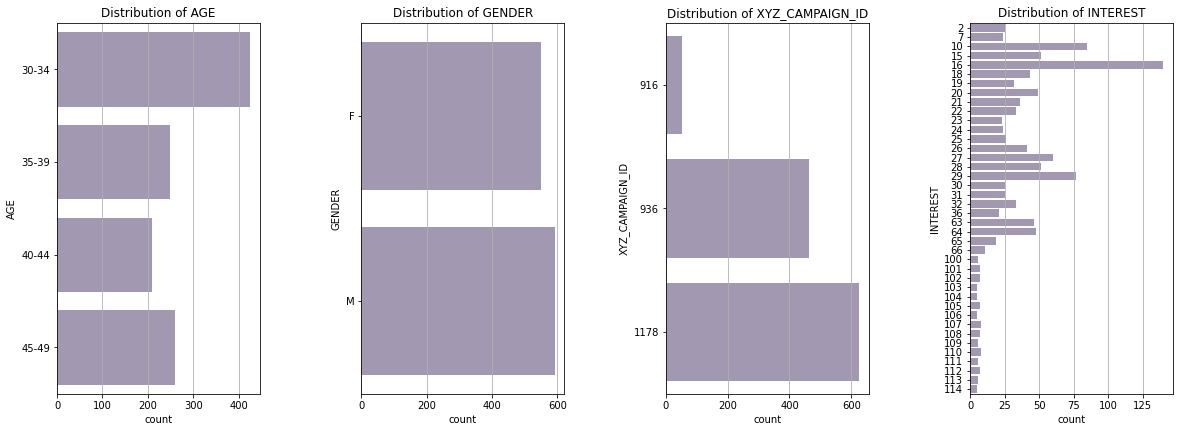

In [11]:
# Distribution of categorical variables, except AD_ID & FB_CAMPAIGN_ID
x=0
fig=plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace = 0.5)

for i in df_c[categories[2:]]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=df_c, y=i, color = '#A194B6')
    plt.grid(axis='x')
    ax.set_title(f'Distribution of {i}')
    x+=1

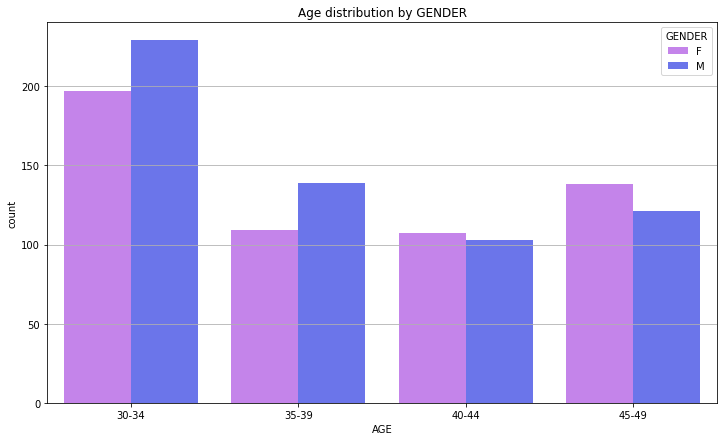

In [12]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=df_c, x='AGE', hue='GENDER', palette=['#C873FB', '#5663FF'])
plt.title('Age distribution by GENDER')
plt.grid(axis='y')

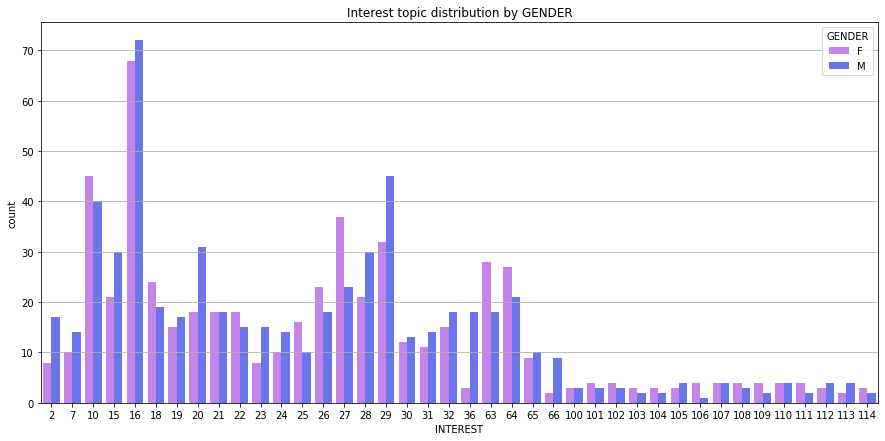

In [13]:
fig=plt.figure(figsize=(15,7))

sns.countplot(data=df_c, x='INTEREST', hue='GENDER', palette=['#C873FB', '#5663FF'])
plt.title('Interest topic distribution by GENDER')
plt.grid(axis='y')

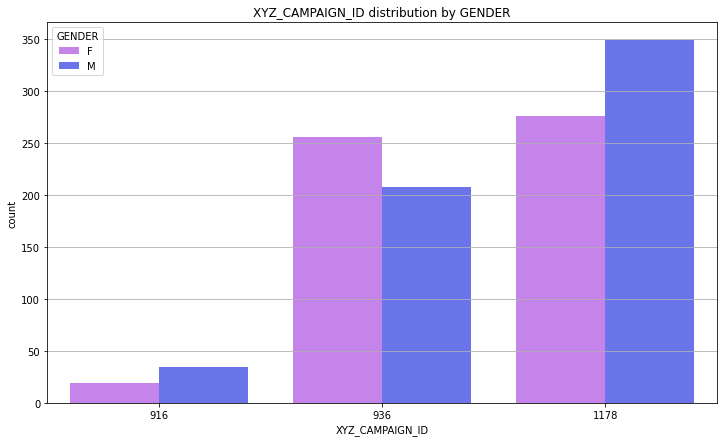

In [14]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=df_c, x='XYZ_CAMPAIGN_ID', hue='GENDER', palette=['#C873FB', '#5663FF'])
plt.title('XYZ_CAMPAIGN_ID distribution by GENDER')
plt.grid(axis='y')

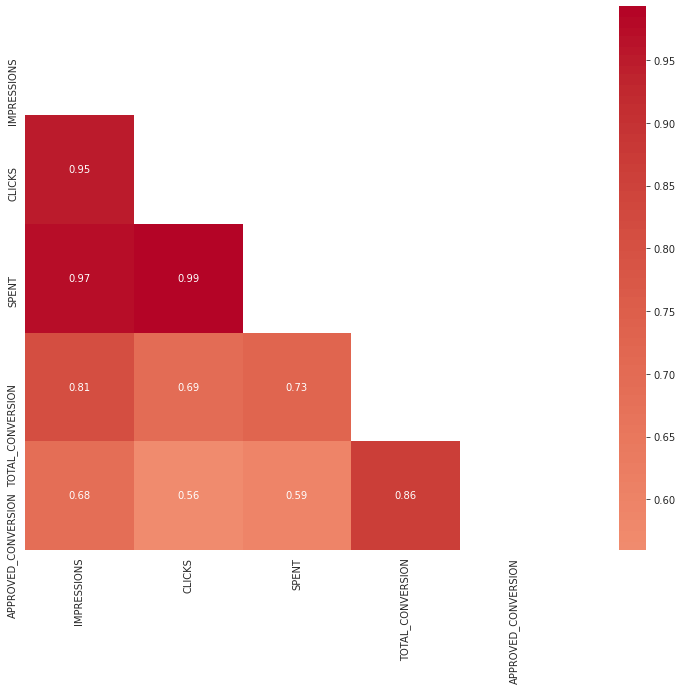

In [15]:
# Correlation matrix
corr = df_c.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

Text(0.5, 0.95, 'Relathionships between numerical features')

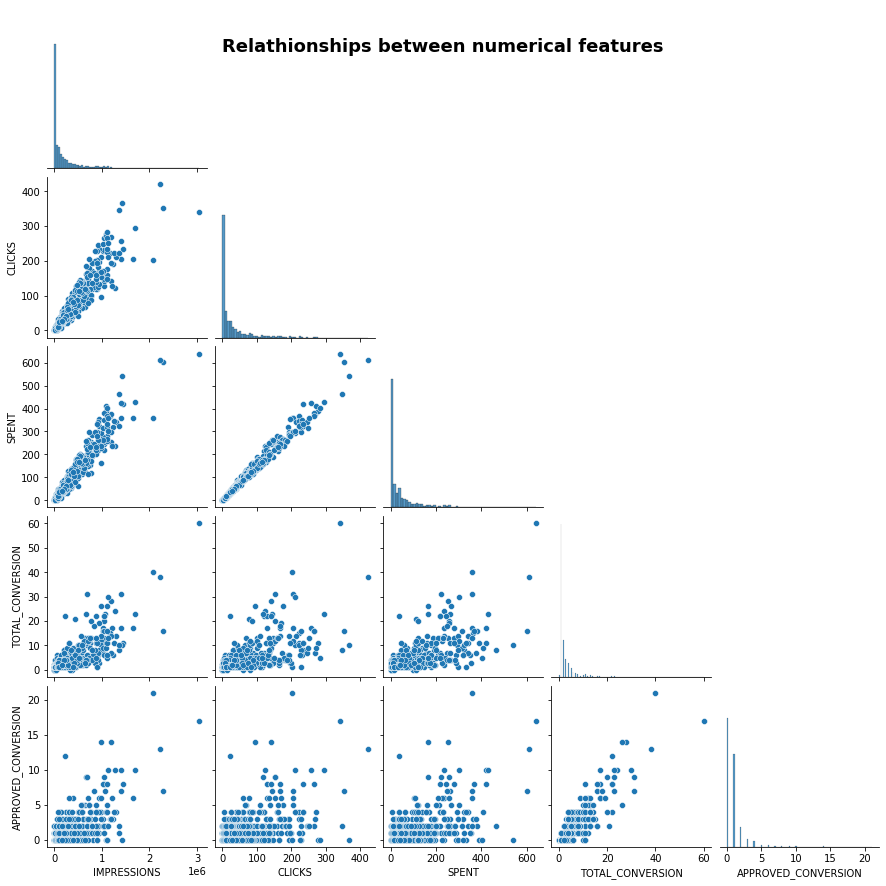

In [16]:
# Relationships between numerical features
sns.pairplot(df_c, corner=True)
plt.suptitle("Relathionships between numerical features", x=0.5 ,y=0.95, size=18, weight='bold')

Text(0.5, 0.95, 'Relathionships between numerical features by GENDER')

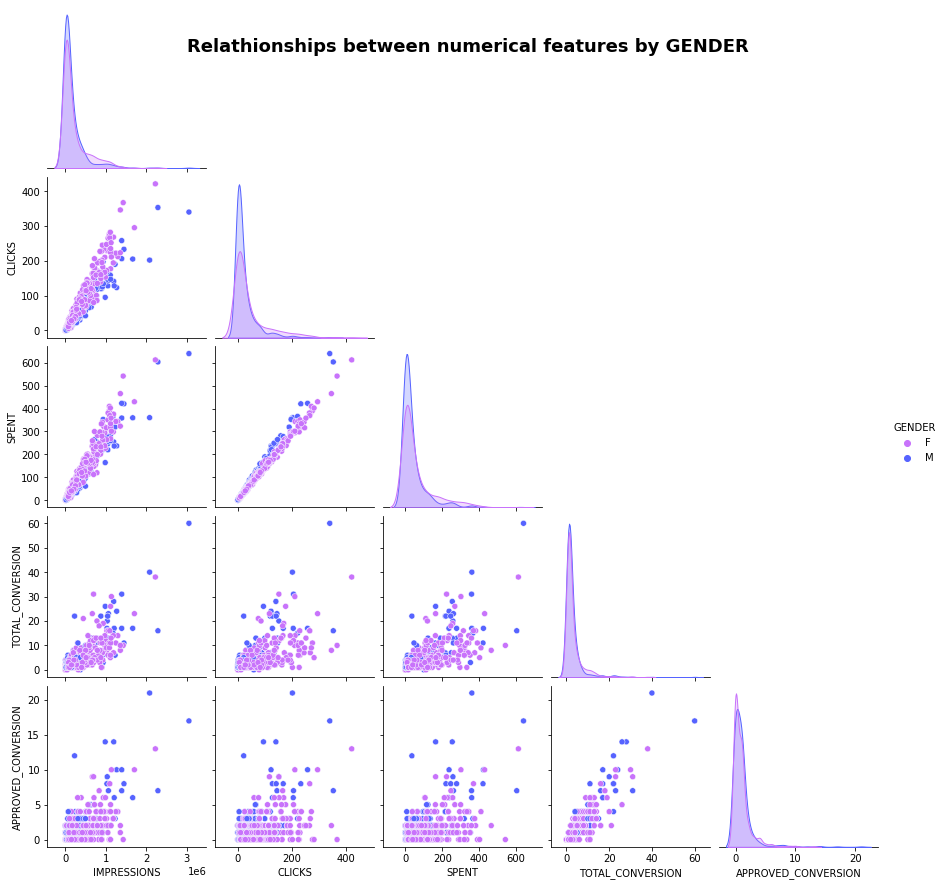

In [17]:
sns.pairplot(df_c, corner=True, hue='GENDER', palette=['#C873FB', '#5663FF'])
plt.suptitle("Relathionships between numerical features by GENDER", x=0.5 ,y=0.95, size=18, weight='bold')

Text(0.5, 0.95, 'Relathionships between numerical features by AGE category')

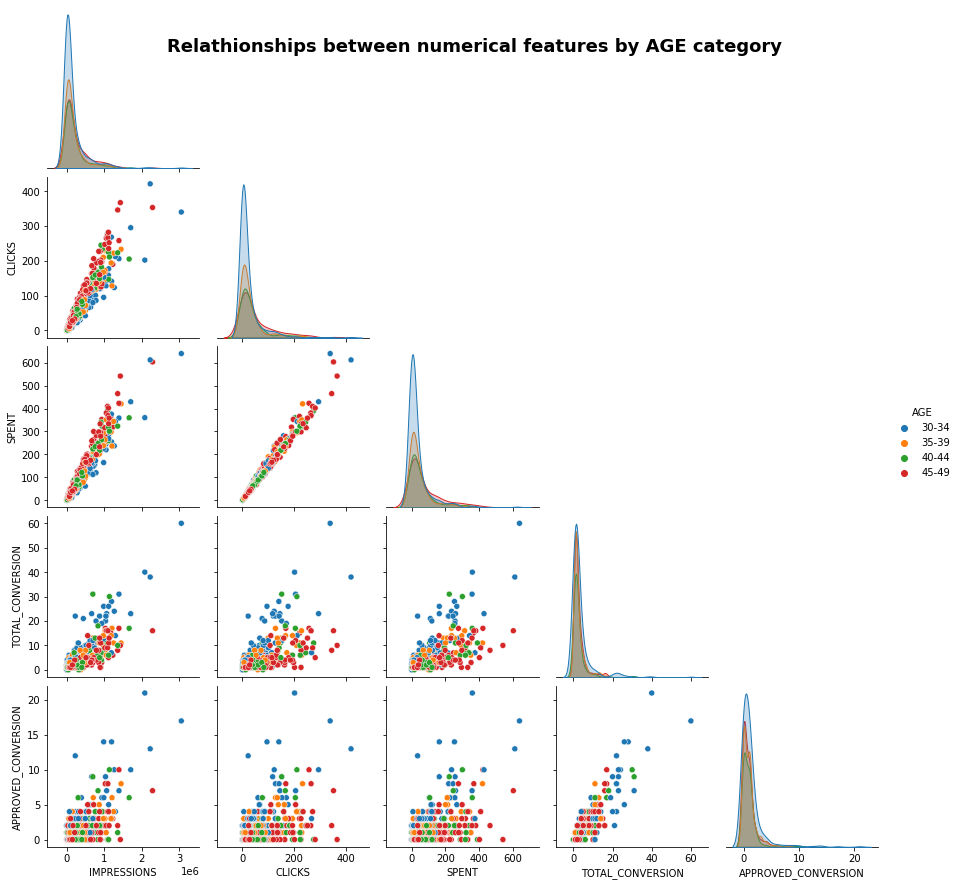

In [18]:
sns.pairplot(df_c, corner=True, hue = 'AGE')
plt.suptitle("Relathionships between numerical features by AGE category", x=0.5 ,y=0.95, size=18, weight='bold')

Text(0.5, 1.0, 'Distribution of "APPROVED_CONVERSION"')

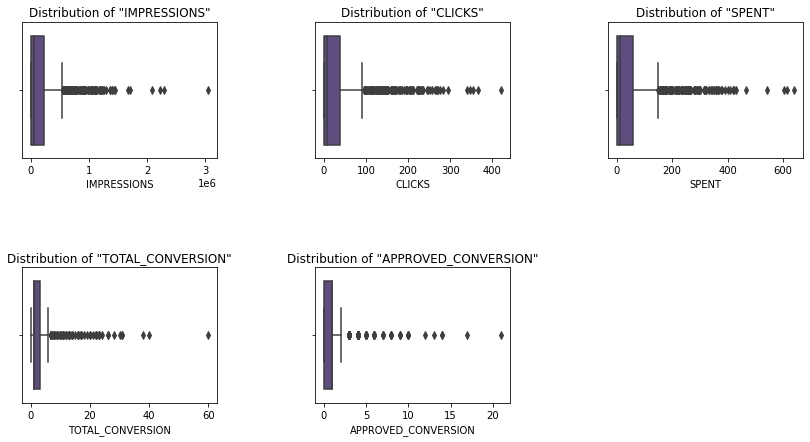

In [19]:
# Show axes
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

# Distribution of our numerical variables using boxplots
fig, axes = plt.subplots(2, 3, figsize=(14, 7), constrained_layout =True)
plt.subplots_adjust(wspace = 0.5, hspace=0.8)
axes[-1, -1].axis('off') # hide axes
 
ax = sns.boxplot(ax = axes[0,0], data=df_c, x='IMPRESSIONS', color='#5E4489')
ax.set_title(f'Distribution of "IMPRESSIONS"')
 
ax1 = sns.boxplot(ax = axes[0,1], data=df_c, x='CLICKS', color='#5E4489')
ax1.set_title(f'Distribution of "CLICKS"')
 
ax2 = sns.boxplot(ax = axes[0,2], data=df_c, x='SPENT', color='#5E4489')
ax2.set_title(f'Distribution of "SPENT"')
 
ax3 = sns.boxplot(ax = axes[1,0], data=df_c, x='TOTAL_CONVERSION', color='#5E4489')
ax3.set_title(f'Distribution of "TOTAL_CONVERSION"')
 
ax4 = sns.boxplot(ax = axes[1,1], data=df_c, x='APPROVED_CONVERSION', color='#5E4489')
ax4.set_title(f'Distribution of "APPROVED_CONVERSION"')

We observe that our features are highly skewed to the lower values.

## **Answering few questions**
What is the MEAN spending on ads by age group?

What is the MEAN spending on ads by gender? 

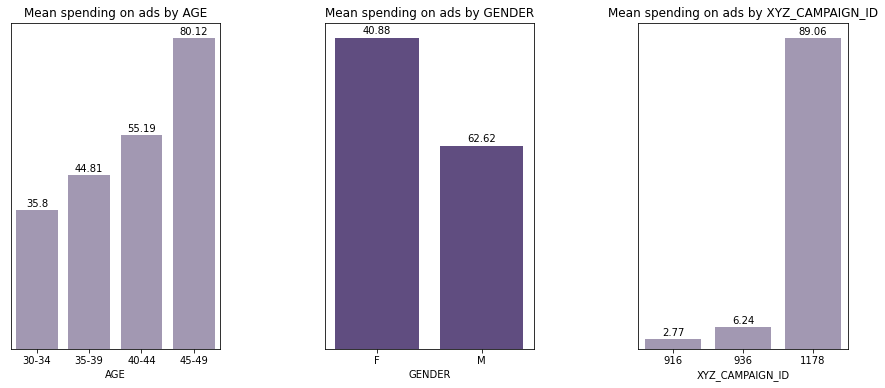

In [20]:
avg_spending_age = df_c.groupby('AGE')['SPENT'].mean().sort_values().reset_index()
avg_spending_gender = df_c.groupby('GENDER')['SPENT'].mean().sort_values().reset_index()
avg_spengind_xyz = df_c.groupby('XYZ_CAMPAIGN_ID')['SPENT'].mean().sort_values().reset_index()

fig, axes = plt.subplots(1,3, figsize=[15,6], constrained_layout=True)
plt.subplots_adjust(wspace = 0.5, hspace=0.8)

# First plot
ax = sns.barplot(ax = axes[0], data=avg_spending_age, x='AGE', y='SPENT', color = '#A194B6')
ax.set_title('Mean spending on ads by AGE')
ax.set_yticks([])
ax.set_ylabel('')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_age['SPENT'][i], 2),ha="center")
    i += 1

# Second plot
ax1 = sns.barplot(ax = axes[1], data=avg_spending_gender, x='GENDER', y='SPENT', color = '#5E4489')
ax1.set_title('Mean spending on ads by GENDER')
ax1.set_yticks([])
ax1.set_ylabel('')
i = 0
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_gender['SPENT'][i], 2),ha="center")
    i += 1

# Third plot
ax2 = sns.barplot(ax = axes[2], data=avg_spengind_xyz, x='XYZ_CAMPAIGN_ID', y='SPENT', color = '#A194B6')
ax2.set_title('Mean spending on ads by XYZ_CAMPAIGN_ID')
ax2.set_yticks([])
ax2.set_ylabel('')
i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spengind_xyz['SPENT'][i], 2),ha="center")
    i += 1

What is the MEAN spending on ads by topic?

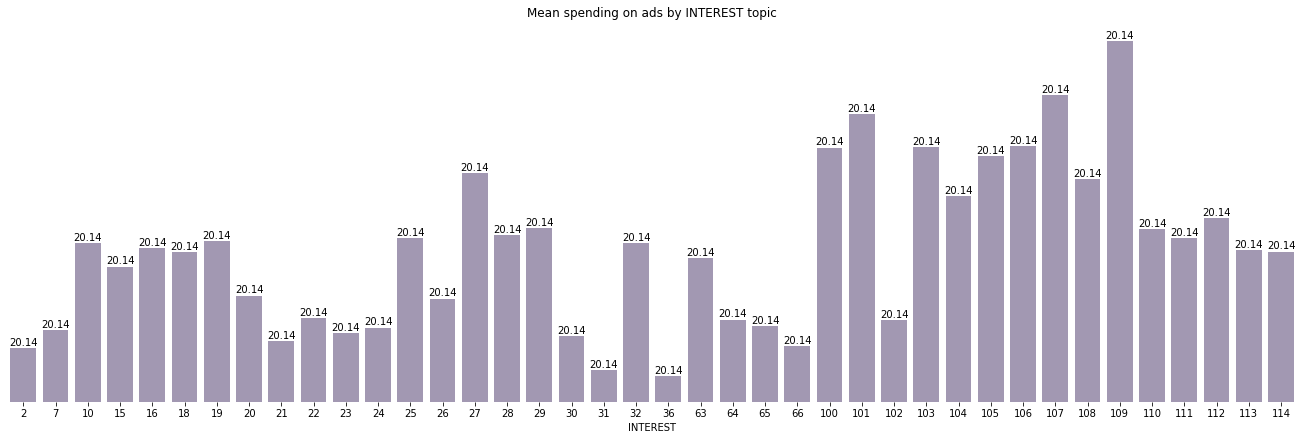

In [21]:
# Hide spines (black border of the plot)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

avg_spending_topic = df_c.groupby('INTEREST')['SPENT'].mean().reset_index()

fig, axes = plt.subplots(1,1, figsize=[18,6], constrained_layout=True)

# First plot
ax = sns.barplot(ax = axes, data=avg_spending_topic, x='INTEREST', y='SPENT', color = '#A194B6')
ax.set_title('Mean spending on ads by INTEREST topic')
ax.set_yticks([])
i = 0
ax.set_ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_topic['SPENT'][i], 2),ha="center")

## **Clustering**

In [22]:
df_c.head()

,AD_ID,XYZ_CAMPAIGN_ID,FB_CAMPAIGN_ID,AGE,GENDER,INTEREST,IMPRESSIONS,CLICKS,SPENT,TOTAL_CONVERSION,APPROVED_CONVERSION
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [23]:
total_conversion_df = df_c.groupby('FB_CAMPAIGN_ID')[['IMPRESSIONS', 'CLICKS', 'SPENT']].mean()
data = pd.DataFrame(total_conversion_df)
data

,IMPRESSIONS,CLICKS,SPENT
FB_CAMPAIGN_ID,,,
103916,7350.0,1.0,1.430000
103917,17861.0,2.0,1.820000
103920,693.0,0.0,0.000000
103928,4196.0,1.0,1.270000
103929,1915.0,0.0,0.000000
...,...,...,...
179977,1129773.0,252.0,358.189997
179978,637549.0,120.0,173.880003
179979,151531.0,28.0,40.289999


## **Preprocessing**

In [24]:
features = total_conversion_df.values

In [25]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.54421246, -0.52820627, -0.53751754],
       [-0.49697268, -0.50480229, -0.53131265],
       [-0.57413114, -0.55161025, -0.56026878],
       ...,
       [ 0.10378284,  0.1037012 ,  0.08074336],
       [ 2.97440278,  2.60792708,  2.60119867],
       [ 1.72906315,  2.1164435 ,  2.07457908]])

## **Choosing the number of K**

ELBOW METHOD

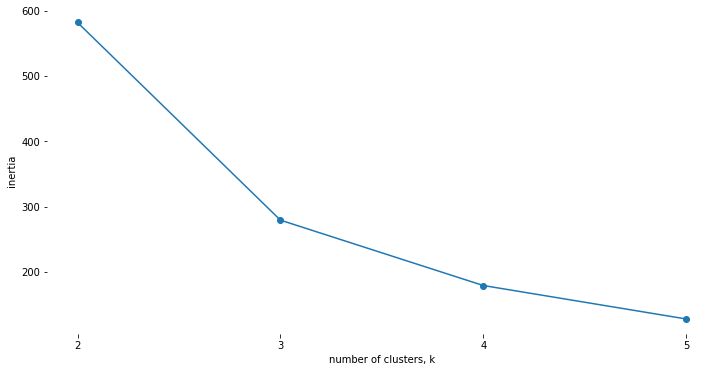

In [26]:
ks = range(2, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters= k)
    clusters =  model.fit(scaled_features)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

SILHOUETTE SCORE

<AxesSubplot:ylabel='n_clusters'>

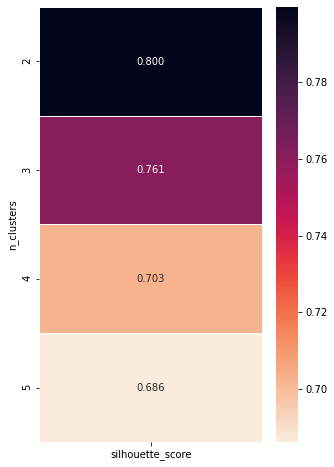

In [27]:
ks = range(2,6)
results = []

for k in ks:
    model = KMeans(n_clusters= k)
    cluster_l = model.fit_predict(scaled_features)
    silh_avg = silhouette_score(scaled_features, cluster_l)
    results.append([k, silh_avg])

result = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure(figsize=(5,8))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap = 'rocket_r')

According to our results, 2 seems to be the number of clusters with highest silhouette score for our features.

Let's consider using 3 clusters.

In [28]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [29]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,IMPRESSIONS,CLICKS,SPENT,Cluster
FB_CAMPAIGN_ID,,,,
103916,7350.0,1.0,1.43,1
103917,17861.0,2.0,1.82,1
103920,693.0,0.0,0.00,1
103928,4196.0,1.0,1.27,1
103929,1915.0,0.0,0.00,1


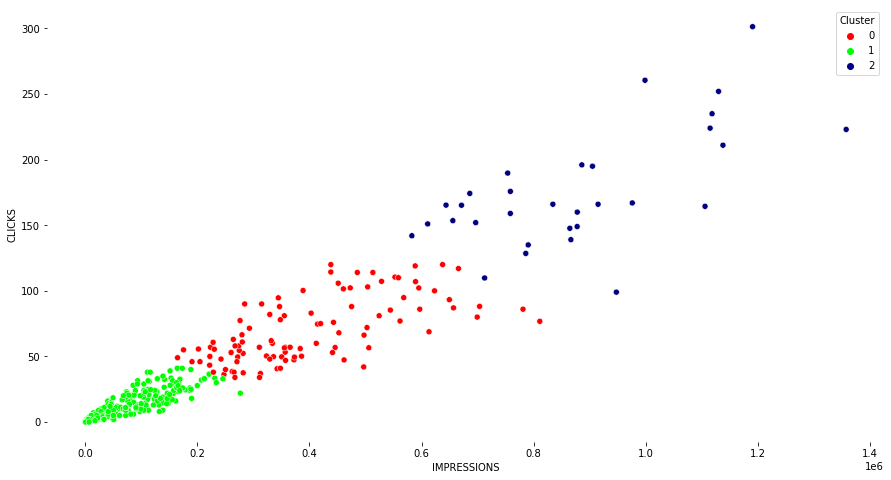

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='IMPRESSIONS', y='CLICKS', hue = 'Cluster', palette=['#FF0000', '#00FF00', '#000080'])
plt.show()

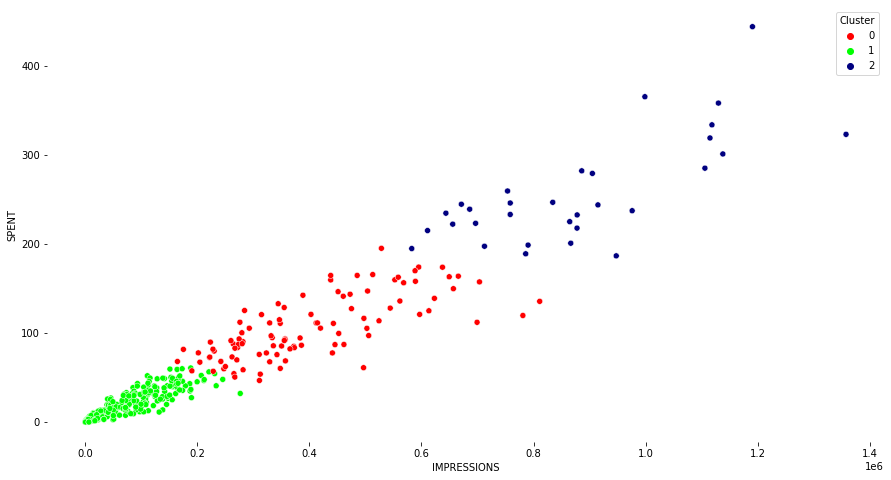

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='IMPRESSIONS', y='SPENT', hue = 'Cluster',  palette=['#FF0000', '#00FF00', '#000080'])
plt.show()

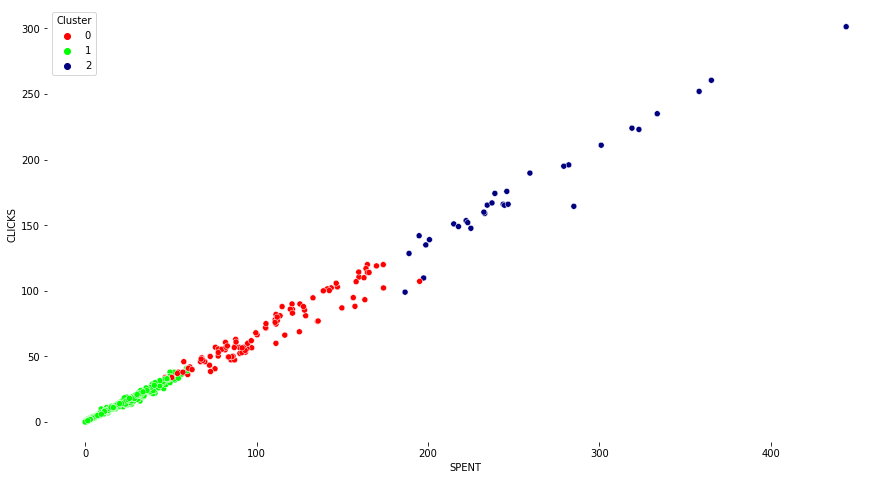

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='SPENT', y='CLICKS', hue = 'Cluster', palette=['#FF0000', '#00FF00', '#000080'])
plt.show()

In [33]:
px.scatter_3d(data_frame=data, x='IMPRESSIONS', y='CLICKS', z='SPENT', color='Cluster', color_continuous_scale=['#FF0000', '#00FF00', '#000080'])